<center><font size = 5><b><i>Assignment3</i></b></font></center>
<div style="text-align: right"><i>By Yi Zhou</i></div>

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
%matplotlib inline
plt.set_cmap('jet');
import warnings
warnings.filterwarnings('ignore') # for deprecated matplotlib functions

## Problem 1

In [102]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

### P1.1

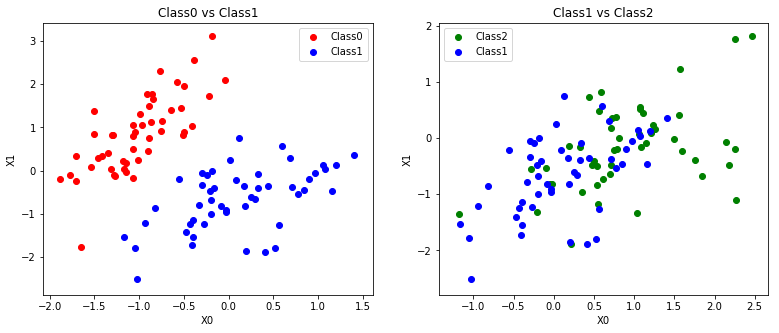

In [103]:
X_1 ,Y_1 = X[Y==1,:], Y[Y==1]
X_0, Y_0 = X[Y==0,:], Y[Y==0]
X_2, Y_2 = X[Y==2,:], Y[Y==2]
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.title("Class0 vs Class1")
plt.scatter(X_0[:,0],X_0[:,1],c="r",label="Class0")
plt.scatter(X_1[:,0],X_1[:,1],c="b",label="Class1")
plt.xlabel("X0")
plt.ylabel("X1")
plt.legend()
fig.add_subplot(1,2,2)
plt.title("Class1 vs Class2")
plt.scatter(X_2[:,0],X_2[:,1],c="g",label="Class2")
plt.scatter(X_1[:,0],X_1[:,1],c="b",label="Class1")
plt.xlabel("X0")
plt.ylabel("X1")
plt.legend()
fig.set_figheight(5)
fig.set_figwidth(13)

#### As we can see, dataset XA,YA which contains Class0 and Class1 is linearly seperatable

### P1.2

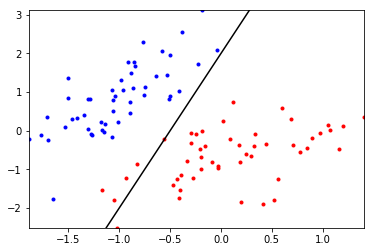

In [106]:
def myPlotBoundary(self,X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    x2b = -(self.theta[1]*x1b+self.theta[0])/self.theta[2]     # TODO find x2 values as a function of x1's values
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    not_A = np.logical_not(A)
    plt.plot(X[A,0],X[A,1],'b.',X[not_A,0],X[not_A,1],'r.',x1b,x2b,'k-');
    plt.axis(ax);
    plt.draw();

# Create a shell classifier
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = None                   # these functions will be implemented later
    train = None
learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = [0.5,1.,-0.25];  # TODO: insert hard-coded values
fig=plt.figure()
#Dataset A
learnerA.plotBoundary(XA,YA)
plt.show()

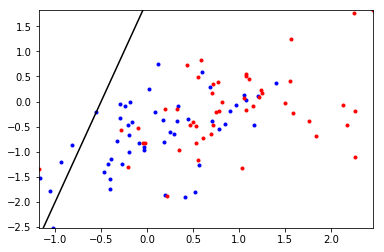

In [109]:
# Dataset B
learnerA = logisticClassify2()
learnerA.classes = np.unique(YB)       # store the class values for this problem
learnerA.theta = [0.5,1.,-0.25];  # TODO: insert hard-coded values
fig=plt.figure()
learnerA.plotBoundary(XB,YB)
plt.show()

### P1.3

In [114]:
# Should go in your logistic2 class:
def myPredict(self,X):
    """ Return the predictied class of each data point in X"""
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]  for each i
    ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    X_app = (np.zeros((X.shape[0],X.shape[1] + 1)) + 1)
    X_app[:,1:] = X
    Y_pred = np.dot(X_app,self.theta) > 0
    Yhat = np.zeros(Y_pred.shape)
    for i in range(Yhat.shape[0]):
        if Y_pred[i] == True:
            Yhat[i] = self.classes[1]
        else:
            Yhat[i] = self.classes[0]
    return Yhat

# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = [0.5,1.,-0.25]  # TODO: insert hard-coded values
print "Training Error for datasetA is: ", learnerA.err(XA,YA)

learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)
learnerB.theta = [0.5,1.,-0.25] 
print "Training Error for datasetB is: ", learnerB.err(XB,YB)
# ...

Training Error for datasetA is:  0.0505050505051
Training Error for datasetB is:  0.464646464646


If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

### P1.4

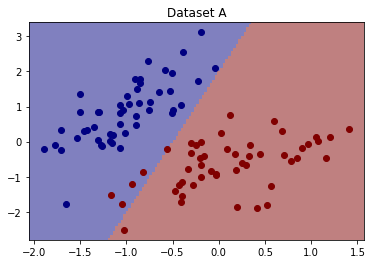

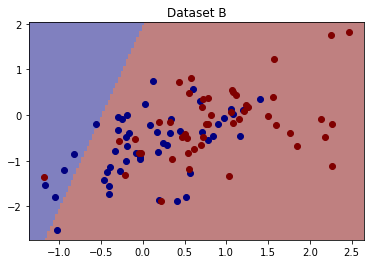

In [118]:
ml.plotClassify2D(learnerA,XA,YA)
plt.title("Dataset A")
plt.show()
ml.plotClassify2D(learnerB,XB,YB)
plt.title("Dataset B")
plt.show()

#### The resulting decision boundary matches the one I plotted previously

## ...


Here is an example of latex equations that may be useful for expressing the gradient:

### 1.5 Gradient of NLL

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Thus, its gradient is:
$$\nabla J_j(\theta) = x^{(i)} \cdot (\sigma(x^{(i)} \cdot \theta) - y^{(i)})$$

### P 1.6

Now define the train function and complete its missing code.

In [166]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = np.dot(XX[i],self.theta);     # TODO: compute linear response r(x)
            sigma = 1./(1. + np.exp(-ri))
            gradi = XX[i]*(sigma - YY[i]);     # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        r = np.dot(XX,self.theta)
        sigma = 1./(1.+np.exp(-r))
        J = -YY * np.log(sigma) - (1 - YY) * np.log(1 - sigma)
        Jsur = np.average(J)
        Jnll.append( Jsur ) # TODO evaluate the current NLL loss
        plt.figure(1);
        plt.plot(Jnll,'b-',label = "Jnll")
        plt.plot(J01,'r-',label ="J01")
        plt.draw();    # plot losses
        if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot
        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke
        if epoch > 2:
        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if epoch > stopEpochs or (np.abs(Jnll[-1] - Jnll[-2]) < stopTol):
                plt.figure(3); self.plotBoundary(X,Y); plt.draw();
                plt.title("Final Boundary")
                done =True
            # or if Jnll not changing between epochs ( < stopTol )

In [167]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

### P 1.7
#### Here below is the learner trained on datasetA, initStep = 0.5, stopEpoch = 5000, stopTol = 1e-4

Final Theta: [ 3.53198656  6.04347183 -3.46687117]


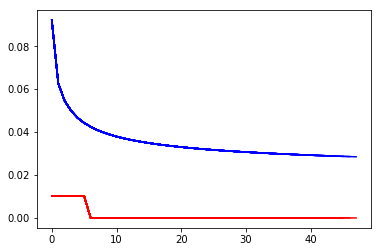

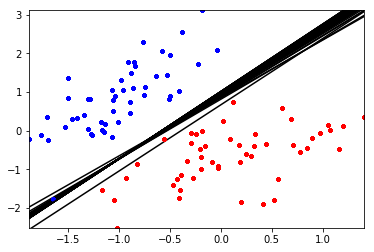

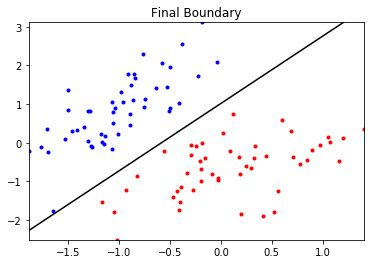

In [168]:
wts = np.array([0.5,1.,-0.25])
learnerA = logisticClassify2()
learnerA.theta = wts; # set the learner's parameters
learnerA.train(XA,YA,initStep=0.5)
print "Final Theta:", learner.theta
plt.show()

#### Here below is the learner trained on datasetB, initStep = 0.5, stopEpoch = 5000, stopTol = 1e-4, as what they are in datasetA

Final Theta: [ 3.53198656  6.04347183 -3.46687117]


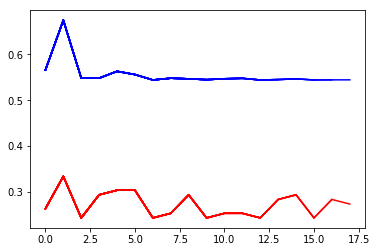

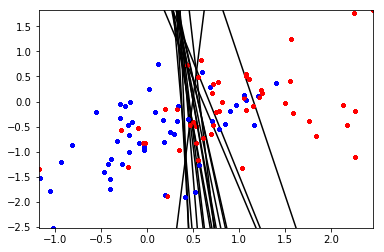

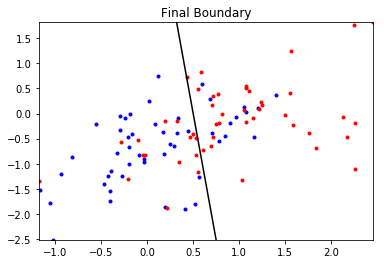

In [169]:
learnerB = logisticClassify2()
learnerB.theta = wts; # set the learner's parameters
learnerB.train(XB,YB,initStep=0.5)
print "Final Theta:", learner.theta
plt.show()

## Problem 2

### 1.
VC Dimension = 2. For the boundary is a vertical line, it can easily shatter 1 or 2 points in (a) (b) but it can not shatter 3 points. Because it can not shatter the points when y1 = +1, y2 = -1 , y3 = +1, when x1 < x2 < x3

### 2.
The boundary is a line which passes the original point in 2D-plane, it can easily shatter 1 or 2 point in (a)(b), but it can not shatter (c).  VC Dimension = 2

### 3.
The boundary is a circle whose center is (a,b). By choosing appropriate center and appropriate radius, it can shatter (a), (b), (c), but it can't shatter (d) when the two pairs of the diagonal points are labeled differently, VC Dimension= 3.

### 4. 
The boundary are two parallel lines, obviously, it can shatter (a),(b),(c),(d), so VC Dimension >= 4

## Problem 3 Statement of Collaboration
I finish all the problems above on my own, without exchanging ideas with anyone